In [ ]:
# for google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# change path as required
print(os.getcwd())
os.chdir('/content/drive/MyDrive/ecg')
print(os.getcwd())

/content
/content/drive/MyDrive/ecg


In [ ]:
# train set sampled, test set left unsampled
train = np.loadtxt("./train_test_sampled/train.csv", delimiter=',')
test = np.loadtxt("./train_test_sampled/test.csv", delimiter=',')

In [ ]:
print(train.shape)
data = train[:,:-3]
print(data.shape)
classes = train[:,-3]
print(classes.shape)

(57944, 259)
(57944, 256)
(57944,)


In [ ]:
print(test.shape)
data = test[:,:-3]
print(data.shape)
classes = test[:,-3]
print(classes.shape)

(54414, 259)
(54414, 256)
(54414,)


In [ ]:
test1 = test
print(test1.shape)

(54414, 259)


(54414, 257)


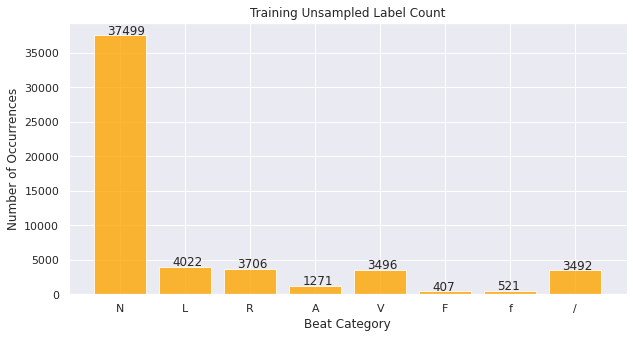

In [ ]:
import seaborn as sns
import pandas as pd
sns.set()
feature_names = ['N','L','R','A','V','F','f','/']

dftrain = pd.DataFrame(test1[:,:-2])
print(dftrain.shape)
countstrain = dftrain[256].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Testing Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+200, yval)
plt.show()

In [ ]:
norm = np.where(test1[:,-3] == 1.0)[0]
print(norm.shape)

test_samp = np.delete(test1, norm[:32000], axis=0)

(37499,)


(22414, 257)


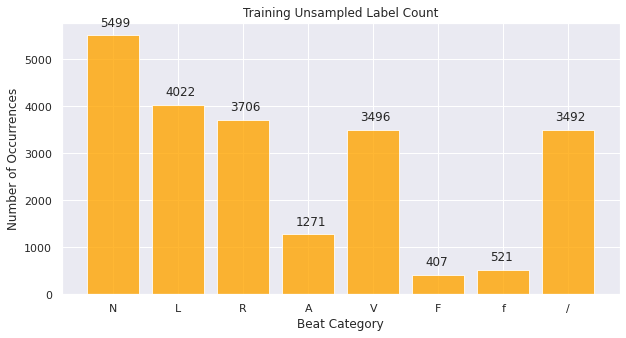

In [ ]:
import seaborn as sns
import pandas as pd
sns.set()
feature_names = ['N','L','R','A','V','F','f','/']

dftrain = pd.DataFrame(test_samp[:,:-2])
print(dftrain.shape)
countstrain = dftrain[256].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Testing Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+200, yval)
plt.show()

## Clustering Test Data: PCA, TSNE, UMAP

In [ ]:
data = test_samp[:,:-3]
classes = test_samp[:,-3]

Text(0.5, 1.0, 'PCA')

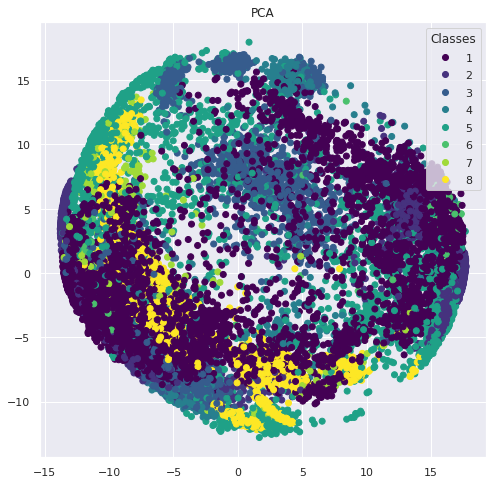

In [ ]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=50,random_state=42).fit_transform(data)
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=classes, cmap='viridis')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA')


In [ ]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2,random_state=42,perplexity=100, verbose=5, n_iter=500).fit_transform(x_pca)
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1],c=classes, cmap='inferno')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and TSNE')


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 22414 samples in 0.180s...
[t-SNE] Computed neighbors for 22414 samples in 19.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22414
[t-SNE] Computed conditional probabilities for sample 2000 / 22414
[t-SNE] Computed conditional probabilities for sample 3000 / 22414
[t-SNE] Computed conditional probabilities for sample 4000 / 22414
[t-SNE] Computed conditional probabilities for sample 5000 / 22414
[t-SNE] Computed conditional probabilities for sample 6000 / 22414
[t-SNE] Computed conditional probabilities for sample 7000 / 22414
[t-SNE] Computed conditional probabilities for sample 8000 / 22414
[t-SNE] Computed conditional probabilities for sample 9000 / 22414
[t-SNE] Computed conditional probabilities for sample 10000 / 22414
[t-SNE] Computed conditional probabilities for sample 11000 / 22414
[t-SNE] Computed conditional probabilities for sample 12000 / 22414
[t-SNE] Computed conditional probabilities for s

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1],c=classes, cmap='viridis')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and TSNE')


In [ ]:
import umap
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=10, a = 0.5, b = 1.2)
embedding = reducer.fit_transform(x_pca)
embedding.shape
plt.figure(figsize=(8,8))

plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=classes, cmap='viridis')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and UMAP')

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=classes, cmap='viridis')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and UMAP')